# Breakdown of filers by state as % from ~500K

In [19]:
# Explore filings done by state abbreviation
print("State  ", "% of filers")
df_merged_zip['State_Abbreviation'].value_counts(normalize=True).head(20)*100

State   %


TX    10.719371
CA     8.807220
FL     6.852775
NY     5.284144
GA     5.013699
PA     4.338407
NC     4.136337
OH     3.796576
IL     3.738540
MI     3.435904
AL     2.692237
LA     2.622922
TN     2.611409
SC     2.475364
VA     2.444583
MO     2.418032
IN     2.202334
MD     1.866098
AZ     1.833438
WA     1.766472
Name: State_Abbreviation, dtype: float64

# Wordcloud for most common words used in filing - once duplicate copies have been removed. 

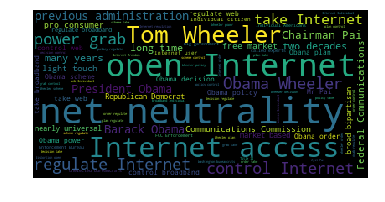

In [141]:
wordcloud_text = WordCloud().generate(' '.join(unique_comments.text_data))
# Generate plot
import matplotlib.pyplot as plt
plt.imshow(wordcloud_text)
plt.axis("off")
plt.show()

In [5]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
## read in sample data
directory = 'E:\\Documents\\DataScience_FCC\\FCC\\'
filename = 'proc_17_108_uniques_clustered_full.csv'
comments = pd.read_csv(directory+filename)

In [2]:
pd.__version__

'0.22.0'

In [7]:
comments.head()

,level_0,level_1,text_data,docid,dupe_count
0,0,-1,The FCC's Open Internet Rules (net neutrality ...,9107566,1.0
1,0,-1,The FCC's Open Internet Rules (net neutrality ...,6006552,2.0
2,0,-1,The FCC's Open Internet Rules (net neutrality ...,10419430,1.0
3,0,-1,The FCC's Open Internet Rules (net neutrality ...,10277835,1.0
4,0,-1,PLEASE BE ADVISED THAT EVERY EMAIL I HAVE IS C...,8315731,4.0


In [9]:
comments.to_csv('TEST_FCC_comments.csv',index=False)


In [31]:
#Imports
import pandas as pd
import psycopg2

#connection
try: 
    conn = psycopg2.connect(host="localhost",database="proc_17_108", user="postgres", password="FezzikIsCute")
except:
    print("I am unable to connect to the database")

#SQL Query    
sql = "SELECT * FROM proc_17_108 LIMIT 1000000"
df = pd.read_sql(sql, conn)


df.to_csv('FCC_comments.csv', index=False)
#df.to_pickle(file_name)  # where to save it, usually as a .pkl
#df = pd.read_pickle(file_name)

conn.close()
df.head()

                         id            date_submission  \
0  59f883d850b733300fdbec7a  2017-05-24T22:58:31+00:00   
1  59f883d850b733300fdbec7b  2017-05-24T22:58:31+00:00   
2  59f883d850b733300fdbec7c  2017-05-24T22:58:31+00:00   
3  59f883d850b733300fdbec7d  2017-05-24T22:58:31+00:00   
4  59f883d850b733300fdbec7e  2017-05-24T22:58:31+00:00   

             contact_email confirmation_number  \
0       amos31wj@yahoo.com  201706031279605654   
1         dseanger@msn.com  201706030519826565   
2  loverlego7787@gmail.com    2017060327172116   
3       crankd84@gmail.com  201706030155900088   
4      lisadh728@yahoo.com   20170603026210221   

                                           text_data           index  \
0  Dear Chairman Pai,  I'm contacting you about r...  filings.2017.5   
1  Chairman Pai:  My comments re: net neutrality ...  filings.2017.5   
2  Mr Pai:  Hi, I'd like to comment on Internet f...  filings.2017.5   
3  Dear Chairman Pai,  I'm very worried about the...  filings.

In [36]:
#with address errors for .Series trying to do for 500K of data only
df_half = df.iloc[:500000]

In [43]:
df_half2.head()

,id,date_submission,contact_email,confirmation_number,text_data,index,filers,addressentity,internationaladdressentity
500000,59f88b9f50b733300fe38ed7,2017-05-25T21:34:18.912Z,OlesBulgakov@mail.ru,201705252520123101,Allowing broadband providers to throttle their...,filings.2017.5,"[{""name"":""Oles Bulgakov""}]","{""city"":"""",""address_line_1"":"""",""state"":"""",""zip...","{""addresstext"":""3703 Foley Street\n33301,Fort ..."
500001,59f88b9f50b733300fe38ed8,2017-05-25T21:34:19.070Z,DennisYefimov@mail.ru,20170525240658220,Allowing broadband providers to throttle their...,filings.2017.5,"[{""name"":""Dennis Yefimov""}]","{""city"":"""",""address_line_1"":"""",""state"":"""",""zip...","{""addresstext"":""3869 Fairmont Avenue\n63501,Ki..."
500002,59f88b9f50b733300fe38ed9,2017-05-25T21:34:19.280Z,EdwardSokolov@mail.ru,2017052524816560,Allowing broadband providers to throttle their...,filings.2017.5,"[{""name"":""Edward Sokolov""}]","{""city"":"""",""address_line_1"":"""",""state"":"""",""zip...","{""addresstext"":""4208 Derek Drive\n44663,New Ph..."
500003,59f88b9f50b733300fe38eda,2017-05-25T21:34:19.335Z,MelaniaYershova@mail.ru,2017052551469049,Please save the internet from the corporations...,filings.2017.5,"[{""name"":""Melania Yershova""}]","{""city"":"""",""address_line_1"":"""",""state"":"""",""zip...","{""addresstext"":""1713 Williams Mine Road\n7921,..."
500004,59f88b9f50b733300fe38edb,2017-05-25T21:34:19.371Z,GerasimosZaitsev@mail.ru,2017052549615429,We should not leave the ability for small comp...,filings.2017.5,"[{""name"":""Gerasimos Zaitsev""}]","{""city"":"""",""address_line_1"":"""",""state"":"""",""zip...","{""addresstext"":""4547 Edsel Road\n90017,Los Ang..."


In [37]:
#expand dictionaries in address entity into their own dataframe df2_half

df_half["addressentity"] = df_half["addressentity"].apply(lambda x : dict(eval(x)))
df2_half = df_half["addressentity"].apply(pd.Series)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [3]:
#explore zipcode dataframe
df2_half.head()

NameError: name 'df2_half' is not defined

Dataframe df_half is basic data 1 to 499,999 

df2_half is 1 to 499,999 is expanded addressentitiy data
df_half2 is 500,000 to 1,000,000

In [46]:
#concatonate the zipcode dataframe to the main df
df_half_concat = pd.concat([df_half, df2_half], axis=1)

In [47]:
# explore concatonated dfs to confirm zipcode was imported
df_half_concat.head()

,id,date_submission,contact_email,confirmation_number,text_data,index,filers,addressentity,internationaladdressentity,address_line_1,address_line_2,city,state,zip4,zip_code
0,59f883d850b733300fdbec7a,2017-05-24T22:58:31+00:00,amos31wj@yahoo.com,201706031279605654,"Dear Chairman Pai, I'm contacting you about r...",filings.2017.5,"[{""name"":""Amos Thompson""}]","{'city': 'W Jefferson', 'address_line_1': '133...","{""addresstext"":""""}",133 Blendon Rd,,W Jefferson,OH,,43162
1,59f883d850b733300fdbec7b,2017-05-24T22:58:31+00:00,dseanger@msn.com,201706030519826565,Chairman Pai: My comments re: net neutrality ...,filings.2017.5,"[{""name"":""Douglas Seanger""}]","{'city': 'Tucson', 'address_line_1': '1650 E R...","{""addresstext"":""""}",1650 E River Rd Ste 104,,Tucson,AZ,,56303
2,59f883d850b733300fdbec7c,2017-05-24T22:58:31+00:00,loverlego7787@gmail.com,2017060327172116,"Mr Pai: Hi, I'd like to comment on Internet f...",filings.2017.5,"[{""name"":""Joe Cohn""}]","{'city': 'Carol Stream', 'address_line_1': '25...","{""addresstext"":""""}",258 E Saint Charles Rd,,Carol Stream,IL,,60188
3,59f883d850b733300fdbec7d,2017-05-24T22:58:31+00:00,crankd84@gmail.com,201706030155900088,"Dear Chairman Pai, I'm very worried about the...",filings.2017.5,"[{""name"":""Danelle Crank""}]","{'city': 'Canon City', 'address_line_1': '2002...","{""addresstext"":""""}",2002 E Main St,,Canon City,CO,,81212
4,59f883d850b733300fdbec7e,2017-05-24T22:58:31+00:00,lisadh728@yahoo.com,20170603026210221,To the Federal Communications Commission: Reg...,filings.2017.5,"[{""name"":""Lisa Hockaday""}]","{'city': 'Raleigh', 'address_line_1': '1818 Wa...","{""addresstext"":""""}",1818 Watkins St,,Raleigh,NC,,27604


In [48]:
#save concatonated data
df_half_concat.to_csv('FCC_comments_500K.csv', index=False)

### read in 500K records with zipcodes

In [4]:
df_500K_zip = pd.read_csv('FCC_comments_500K.csv', encoding='utf8')
df_500K_zip.head()

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,date_submission,contact_email,confirmation_number,text_data,index,filers,addressentity,internationaladdressentity,address_line_1,city,state,zip_code,international_address_text
0,59f883d850b733300fdbec7a,2017-05-24T22:58:31+00:00,amos31wj@yahoo.com,201706031279605654,"Dear Chairman Pai, I'm contacting you about r...",filings.2017.5,"[{""name"":""Amos Thompson""}]","{'city': 'W Jefferson', 'address_line_1': '133...",{'addresstext': ''},133 Blendon Rd,W Jefferson,OH,43162,NaN
1,59f883d850b733300fdbec7b,2017-05-24T22:58:31+00:00,dseanger@msn.com,201706030519826565,Chairman Pai: My comments re: net neutrality ...,filings.2017.5,"[{""name"":""Douglas Seanger""}]","{'city': 'Tucson', 'address_line_1': '1650 E R...",{'addresstext': ''},1650 E River Rd Ste 104,Tucson,AZ,56303,NaN
2,59f883d850b733300fdbec7c,2017-05-24T22:58:31+00:00,loverlego7787@gmail.com,2017060327172116,"Mr Pai: Hi, I'd like to comment on Internet f...",filings.2017.5,"[{""name"":""Joe Cohn""}]","{'city': 'Carol Stream', 'address_line_1': '25...",{'addresstext': ''},258 E Saint Charles Rd,Carol Stream,IL,60188,NaN
3,59f883d850b733300fdbec7d,2017-05-24T22:58:31+00:00,crankd84@gmail.com,201706030155900088,"Dear Chairman Pai, I'm very worried about the...",filings.2017.5,"[{""name"":""Danelle Crank""}]","{'city': 'Canon City', 'address_line_1': '2002...",{'addresstext': ''},2002 E Main St,Canon City,CO,81212,NaN
4,59f883d850b733300fdbec7e,2017-05-24T22:58:31+00:00,lisadh728@yahoo.com,20170603026210221,To the Federal Communications Commission: Reg...,filings.2017.5,"[{""name"":""Lisa Hockaday""}]","{'city': 'Raleigh', 'address_line_1': '1818 Wa...",{'addresstext': ''},1818 Watkins St,Raleigh,NC,27604,NaN


In [6]:
df_500K_zip.drop(['address_line_2', 'zip4'], axis=1)

,id,date_submission,contact_email,confirmation_number,text_data,index,filers,addressentity,internationaladdressentity,address_line_1,city,state,zip_code
0,59f883d850b733300fdbec7a,2017-05-24T22:58:31+00:00,amos31wj@yahoo.com,201706031279605654,"Dear Chairman Pai, I'm contacting you about r...",filings.2017.5,"[{""name"":""Amos Thompson""}]","{'city': 'W Jefferson', 'address_line_1': '133...","{""addresstext"":""""}",133 Blendon Rd,W Jefferson,OH,43162
1,59f883d850b733300fdbec7b,2017-05-24T22:58:31+00:00,dseanger@msn.com,201706030519826565,Chairman Pai: My comments re: net neutrality ...,filings.2017.5,"[{""name"":""Douglas Seanger""}]","{'city': 'Tucson', 'address_line_1': '1650 E R...","{""addresstext"":""""}",1650 E River Rd Ste 104,Tucson,AZ,56303
2,59f883d850b733300fdbec7c,2017-05-24T22:58:31+00:00,loverlego7787@gmail.com,2017060327172116,"Mr Pai: Hi, I'd like to comment on Internet f...",filings.2017.5,"[{""name"":""Joe Cohn""}]","{'city': 'Carol Stream', 'address_line_1': '25...","{""addresstext"":""""}",258 E Saint Charles Rd,Carol Stream,IL,60188
3,59f883d850b733300fdbec7d,2017-05-24T22:58:31+00:00,crankd84@gmail.com,201706030155900088,"Dear Chairman Pai, I'm very worried about the...",filings.2017.5,"[{""name"":""Danelle Crank""}]","{'city': 'Canon City', 'address_line_1': '2002...","{""addresstext"":""""}",2002 E Main St,Canon City,CO,81212
4,59f883d850b733300fdbec7e,2017-05-24T22:58:31+00:00,lisadh728@yahoo.com,20170603026210221,To the Federal Communications Commission: Reg...,filings.2017.5,"[{""name"":""Lisa Hockaday""}]","{'city': 'Raleigh', 'address_line_1': '1818 Wa...","{""addresstext"":""""}",1818 Watkins St,Raleigh,NC,27604
5,59f883d850b733300fdbec7f,2017-05-24T22:58:31+00:00,lulu71360@yahoo.com,2017060370782622,FCC: I want to give my opinion on net neutral...,filings.2017.5,"[{""name"":""Cindy Harrison""}]","{'city': 'Pineville', 'address_line_1': '166 M...","{""addresstext"":""""}",166 Moss Ridge Dr,Pineville,LA,71360
6,59f883d850b733300fdbec80,2017-05-24T22:58:31+00:00,wynettarhodes@gmail.com,201706032203224596,Mr Pai: I am a voter worried about regulation...,filings.2017.5,"[{""name"":""Wynetta Rhodes""}]","{'city': 'Poplarville', 'address_line_1': '211...","{""addresstext"":""""}",211 Robert Rhodes Rd,Poplarville,MS,39470
7,59f883d850b733300fdbec81,2017-05-24T22:58:31+00:00,tnorfleet17@gmail.com,20170603222186804,"Dear FCC, I'm concerned about internet regula...",filings.2017.5,"[{""name"":""Te'Ara Norfleet""}]","{'city': 'Greenville', 'address_line_1': '201 ...","{""addresstext"":""""}",201 Whittington Circle,Greenville,NC,27834
8,59f883d850b733300fdbec82,2017-05-24T22:58:31+00:00,bobby72beals@gmail.com,20170603305592227,With respect to net neutrality and Title II. I...,filings.2017.5,"[{""name"":""Robert Patterson""}]","{'city': 'Dimondale', 'address_line_1': '210 E...","{""addresstext"":""""}",210 E. Main Street #105,Dimondale,MI,48876
9,59f883d850b733300fdbec83,2017-05-24T22:58:31+00:00,jbshealy@yahoo.com,20170603071138280,To the Federal Communications Commission: I a...,filings.2017.5,"[{""name"":""James Shealy""}]","{'city': 'Saluda', 'address_line_1': '1112 Bat...","{""addresstext"":""""}",1112 Batesburg Hwy,Saluda,SC,29138


In [7]:
#Explore main dataframe
df_500K_zip.zip_code.head()

0    43162
1    56303
2    60188
3    81212
4    27604
Name: zip_code, dtype: object

In [17]:
df_500_intl.head()

0    {"addresstext":""}
1    {"addresstext":""}
2    {"addresstext":""}
3    {"addresstext":""}
4    {"addresstext":""}
Name: internationaladdressentity, dtype: object

In [ ]:
df.to_csv('FCC_comments_zip.csv', index=False)

In [ ]:
from wordcloud.wordcloud import WordCloud

In [32]:
df_500K_zip['text_data_text']= df_500K_zip['text_data'].astype(str)

In [54]:
df_500K_zip['zip_code_text']= df_500K_zip['zip_code'].astype(str)

In [44]:
df_500K_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
id                            500000 non-null object
date_submission               500000 non-null object
contact_email                 499620 non-null object
confirmation_number           500000 non-null int64
text_data                     499939 non-null object
index                         500000 non-null object
filers                        500000 non-null object
addressentity                 500000 non-null object
internationaladdressentity    500000 non-null object
address_line_1                441065 non-null object
address_line_2                282 non-null object
city                          441068 non-null object
state                         441070 non-null object
zip4                          123 non-null object
zip_code                      441068 non-null object
text_data_text                500000 non-null object
dtypes: int64(1), object(15)
memory usage: 61.0+

In [39]:
# Selecting only zipcodes with length 5: ~430K records
mask_zip5 = (df_500K_zip['zip_code'].str.len() == 5)
df_zip5 = df_500K_zip.loc[mask_zip5]
df_zip5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430360 entries, 0 to 499878
Data columns (total 14 columns):
id                            430360 non-null object
date_submission               430360 non-null object
contact_email                 430002 non-null object
confirmation_number           430360 non-null int64
text_data                     430302 non-null object
index                         430360 non-null object
filers                        430360 non-null object
addressentity                 430360 non-null object
internationaladdressentity    430360 non-null object
address_line_1                430355 non-null object
city                          430357 non-null object
state                         430358 non-null object
zip_code                      430360 non-null object
international_address_text    0 non-null object
dtypes: int64(1), object(13)
memory usage: 49.3+ MB


In [48]:
#select 100 from zipcode correct batch for inspection and grading a fake or not
df_zip5_100 = df_zip5.iloc[:100]

df_zip5_100.to_csv('FCC_df_zip5.csv',index=False)

In [51]:
df_zip5_100.head()

,id,date_submission,contact_email,confirmation_number,text_data,index,filers,addressentity,internationaladdressentity,address_line_1,city,state,zip_code,international_address_text
0,59f883d850b733300fdbec7a,2017-05-24T22:58:31+00:00,amos31wj@yahoo.com,201706031279605654,"Dear Chairman Pai, I'm contacting you about r...",filings.2017.5,"[{""name"":""Amos Thompson""}]","{'city': 'W Jefferson', 'address_line_1': '133...",{'addresstext': ''},133 Blendon Rd,W Jefferson,OH,43162,NaN
1,59f883d850b733300fdbec7b,2017-05-24T22:58:31+00:00,dseanger@msn.com,201706030519826565,Chairman Pai: My comments re: net neutrality ...,filings.2017.5,"[{""name"":""Douglas Seanger""}]","{'city': 'Tucson', 'address_line_1': '1650 E R...",{'addresstext': ''},1650 E River Rd Ste 104,Tucson,AZ,56303,NaN
2,59f883d850b733300fdbec7c,2017-05-24T22:58:31+00:00,loverlego7787@gmail.com,2017060327172116,"Mr Pai: Hi, I'd like to comment on Internet f...",filings.2017.5,"[{""name"":""Joe Cohn""}]","{'city': 'Carol Stream', 'address_line_1': '25...",{'addresstext': ''},258 E Saint Charles Rd,Carol Stream,IL,60188,NaN
3,59f883d850b733300fdbec7d,2017-05-24T22:58:31+00:00,crankd84@gmail.com,201706030155900088,"Dear Chairman Pai, I'm very worried about the...",filings.2017.5,"[{""name"":""Danelle Crank""}]","{'city': 'Canon City', 'address_line_1': '2002...",{'addresstext': ''},2002 E Main St,Canon City,CO,81212,NaN
4,59f883d850b733300fdbec7e,2017-05-24T22:58:31+00:00,lisadh728@yahoo.com,20170603026210221,To the Federal Communications Commission: Reg...,filings.2017.5,"[{""name"":""Lisa Hockaday""}]","{'city': 'Raleigh', 'address_line_1': '1818 Wa...",{'addresstext': ''},1818 Watkins St,Raleigh,NC,27604,NaN


In [45]:
# Selecting with overlong >5 characters : ~1600 records
mask = (df_500K_zip['zip_code'].str.len() > 5)
df_bad_zip = df_500K_zip.loc[mask]
df_bad_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1608 entries, 323368 to 484310
Data columns (total 14 columns):
id                            1608 non-null object
date_submission               1608 non-null object
contact_email                 1607 non-null object
confirmation_number           1608 non-null int64
text_data                     1607 non-null object
index                         1608 non-null object
filers                        1608 non-null object
addressentity                 1608 non-null object
internationaladdressentity    1608 non-null object
address_line_1                1607 non-null object
city                          1607 non-null object
state                         1607 non-null object
zip_code                      1608 non-null object
international_address_text    0 non-null object
dtypes: int64(1), object(13)
memory usage: 188.4+ KB


In [49]:
#select 100 from zipcode correct batch for inspection and grading a fake or not
df_bad_zip_100 = df_bad_zip.iloc[:100]

df_bad_zip_100.to_csv('FCC_df_badzip.csv',index=False)

In [50]:
df_bad_zip_100.head()

,id,date_submission,contact_email,confirmation_number,text_data,index,filers,addressentity,internationaladdressentity,address_line_1,city,state,zip_code,international_address_text
323368,59f8884750b733300fe0dba3,2017-05-25T00:57:46.684Z,lmg9x@aim.com,20170525120301222,The FCC needs to stand up for Internet users l...,filings.2017.5,"[{""name"":""Lisa Gilman""}]","{'city': 'Lafayette', 'address_line_1': '915 D...",{'addresstext': ''},915 Delos Cir,Lafayette,CO,80026-1113,NaN
324143,59f8884750b733300fe0dc7e,2017-05-25T01:33:40.268Z,netsparker@example.com,20170525553001564,The FCC needs to stand up for Internet users l...,filings.2017.5,"[{""name"":""\nnetsparker(0x000A32);""}]","{'city': 'Chicago', 'address_line_1': '3', 'st...",{'addresstext': ''},3,Chicago,VI,208.100.0.117,NaN
324145,59f8884750b733300fe0dc80,2017-05-25T01:33:41.709Z,netsparker@example.com,201705251323809163,The FCC needs to stand up for Internet users l...,filings.2017.5,"[{""name"":""http://r87.com/?dearfcc.org/""}]","{'city': 'Chicago', 'address_line_1': '3', 'st...",{'addresstext': ''},3,Chicago,VI,208.100.0.117,NaN
324146,59f8884750b733300fe0dc81,2017-05-25T01:33:41.749Z,netsparker@example.com,20170525694712885,The FCC needs to stand up for Internet users l...,filings.2017.5,"[{""name"":""Smith""}]","{'city': '& ping -n 25 127.0.0.1 &', 'address_...",{'addresstext': ''},3,& ping -n 25 127.0.0.1 &,VI,208.100.0.117,NaN
324147,59f8884750b733300fe0dc82,2017-05-25T01:33:42.193Z,netsparker@example.com,201705252122122228,The FCC needs to stand up for Internet users l...,filings.2017.5,"[{""name"":""Smith""}]","{'city': '""& SET /A 0xFFF9999-2 &', 'address_l...",{'addresstext': ''},3,"""& SET /A 0xFFF9999-2 &",VI,208.100.0.117,NaN


In [52]:
#select 100 from zipcode correct batch for inspection and grading a fake or not
df_zip5_mid = df_zip5.iloc[50000:50100]

df_zip5_mid.to_csv('FCC_df_zip5_mid.csv',index=False)

In [54]:
df_zip5_mid.head()

,id,date_submission,contact_email,confirmation_number,text_data,index,filers,addressentity,internationaladdressentity,address_line_1,city,state,zip_code,international_address_text
50000,59f8846350b733300fdca84b,2017-05-24T23:09:20+00:00,tommydr@live.com,201706032624526553,Dear Commissioners: I am a voter worried abou...,filings.2017.5,"[{""name"":""Tomas Ramirez""}]","{'city': 'Clearwater', 'address_line_1': '1730...",{'addresstext': ''},1730 Jefferson Ave,Clearwater,FL,33759,NaN
50001,59f8846350b733300fdca84c,2017-05-24T23:09:20+00:00,jerybrett@aol.com,201706032452518507,Mr Pai: In the matter of internet regulations...,filings.2017.5,"[{""name"":""Sheila Matthews""}]","{'city': 'Birmingham', 'address_line_1': '2117...",{'addresstext': ''},2117 Vicki Dr,Birmingham,AL,35235,NaN
50002,59f8846350b733300fdca84d,2017-05-24T23:09:20+00:00,jdhollan@mchsi.com,20170603697605729,"Dear FCC, I would like to comment on Title 2 ...",filings.2017.5,"[{""name"":""Dana Hollan""}]","{'city': 'Farmington', 'address_line_1': '60 B...",{'addresstext': ''},60 Bendefield Rd,Farmington,KY,42040,NaN
50003,59f8846350b733300fdca84e,2017-05-24T23:09:20+00:00,jesse.bridges15@gmail.com,20170603033252267,I have concerns about net neutrality rules. I ...,filings.2017.5,"[{""name"":""Jesse Bridges""}]","{'city': 'Caryville', 'address_line_1': '1787 ...",{'addresstext': ''},1787 Highway 116,Caryville,TN,37714,NaN
50004,59f8846350b733300fdca84f,2017-05-24T23:09:20+00:00,sharpedonna@gmail.com,20170603305416678,FCC: I would like to comment on the FCC's Ope...,filings.2017.5,"[{""name"":""Donna Sharpe""}]","{'city': 'Sparta', 'address_line_1': '148 Jame...",{'addresstext': ''},148 James Holman Rd,Sparta,TN,38583,NaN


In [59]:
#select 100 from zipcode correct batch for inspection and grading a fake or not
df_zip5_end = df_zip5.iloc[430000:430100]

df_zip5_end.to_csv('FCC_df_zip5_end.csv',index=False)

In [60]:
df_zip5_end.head()

,id,date_submission,contact_email,confirmation_number,text_data,index,filers,addressentity,internationaladdressentity,address_line_1,city,state,zip_code,international_address_text
457390,59f88aa650b733300fe2da17,2017-05-25T16:25:26.831Z,bobbywego@gmail.com,2017052571998894,I am deeply concerned over the Notice of Propo...,filings.2017.5,"[{""name"":""Robert Wengronowitz""}]","{'city': 'Davenport', 'address_line_1': '2514 ...",{'addresstext': ''},2514 E. 18th St.,Davenport,IA,52803,NaN
457391,59f88aa650b733300fe2da18,2017-05-25T16:25:42.688Z,ganriel.thomason@gmail.com,20170525555730906,The FCC should safeguard Internet freedom by k...,filings.2017.5,"[{""name"":""Gabriel Thomason""}]","{'city': 'Warner Robins', 'address_line_1': '1...",{'addresstext': ''},123 SRingwood Dr.,Warner Robins,GA,31088,NaN
457392,59f88aa650b733300fe2da19,2017-05-25T16:26:32.472Z,kyliepborges@gmail.com,20170525914823126,"I support strong net neutrality, backed by Tit...",filings.2017.5,"[{""name"":""Kylie Borges""}]","{'city': 'Redwood City', 'address_line_1': '62...",{'addresstext': ''},628 California Way,Redwood City,CA,94062,NaN
457394,59f88aa650b733300fe2da1b,2017-05-25T16:28:36.684Z,NaN,2017052515716341,Preserve net neutrality and title II. Don't le...,filings.2017.5,"[{""name"":""Joe D.""}]","{'city': 'West Babylon', 'address_line_1': '12...",{'addresstext': ''},1233 2nd st.,West Babylon,NY,11704,NaN
457395,59f88aa650b733300fe2da1c,2017-05-25T16:30:32.053Z,sarahaarnold@outlook.com,2017052535186436,I specifically support strong net neutrality t...,filings.2017.5,"[{""name"":""Sarah Arnold""}]","{'city': 'Minneapolis', 'address_line_1': '263...",{'addresstext': ''},2633 Pleasant Ave S,Minneapolis,MN,55408,NaN


In [36]:
df_500K_zip.loc[323368]['text_data']

'The FCC needs to stand up for Internet users like me and keep the net neutrality rules that are already in effect. \r\r\r\n\r\r\r\nThe FCC should reject Chairman Ajit Pai’s plan to give the telecom giants like Verizon, Comcast, and AT&T free rein to engage in data discrimination, stripping Internet users of the vital privacy and access protections we demanded and won just two years ago. \r\r\r\n\r\r\r\nI’m concerned about ISPs being allowed to discriminate against certain types of data or websites because ISPs could have too much power to determine what I can do online. Thankfully, the current FCC regulations ensure that Internet providers can’t block or slow Internet users’ access to certain websites or create Internet “fast lanes” by charging websites and online services more money to reach people faster. That’s the best way forward to make sure competition in the Internet space is fair and benefits consumers and small businesses as well as larger players. Pai’s proposed repeal of t

In [82]:
# import zip codes, cities, states and geo coordinates 
us_postal_codes = pd.read_csv('us_postal_codes_as_str.csv', encoding='utf8')
us_postal_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40933 entries, 0 to 40932
Data columns (total 8 columns):
Zip_Code_num          40933 non-null int64
Place_Name            40933 non-null object
State                 40918 non-null object
State_Abbreviation    40933 non-null object
County                40928 non-null object
Latitude              40933 non-null float64
Longitude             40933 non-null float64
Zip_Code_str          40933 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 2.5+ MB


In [83]:
#convert zip code integer to string
us_postal_codes['Zip_Code_str'] = us_postal_codes['Zip_Code_str'].astype(str).str.zfill(5)
us_postal_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40933 entries, 0 to 40932
Data columns (total 8 columns):
Zip_Code_num          40933 non-null int64
Place_Name            40933 non-null object
State                 40918 non-null object
State_Abbreviation    40933 non-null object
County                40928 non-null object
Latitude              40933 non-null float64
Longitude             40933 non-null float64
Zip_Code_str          40933 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 2.5+ MB


In [84]:
# explore zip code conversion
us_postal_codes.head()

,Zip_Code_num,Place_Name,State,State_Abbreviation,County,Latitude,Longitude,Zip_Code_str
0,501,Holtsville,New York,NY,Suffolk,40.8154,-73.0451,00501
1,544,Holtsville,New York,NY,Suffolk,40.8154,-73.0451,00544
2,1001,Agawam,Massachusetts,MA,Hampden,42.0702,-72.6227,01001
3,1002,Amherst,Massachusetts,MA,Hampshire,42.3671,-72.4646,01002
4,1003,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,01003


In [87]:
#explore dataframe state abbreviations
df_zip5.groupby(['state']).size().head(8)
#needs cleaning up

state
--              1
AK            742
AL          11494
AR           6194
AZ           7909
Alabama         5
Arizona        10
Arkansas        1
dtype: int64

In [100]:
# merge df_zip5 with us_postal_codes to create an appropriate mapping for state_abbreviations
df_merged_zip = pd.merge(df_zip5, us_postal_codes, left_on='zip_code',right_on='Zip_Code_str')

In [101]:
# Explore df_merged_zip
df_merged_zip.head()

,id,date_submission,contact_email,confirmation_number,text_data,index,filers,addressentity,internationaladdressentity,address_line_1,...,zip_code,international_address_text,Zip_Code_num,Place_Name,State,State_Abbreviation,County,Latitude,Longitude,Zip_Code_str
0,59f883d850b733300fdbec7a,2017-05-24T22:58:31+00:00,amos31wj@yahoo.com,201706031279605654,"Dear Chairman Pai, I'm contacting you about r...",filings.2017.5,"[{""name"":""Amos Thompson""}]","{'city': 'W Jefferson', 'address_line_1': '133...",{'addresstext': ''},133 Blendon Rd,...,43162,NaN,43162,West Jefferson,Ohio,OH,Madison,39.9424,-83.2853,43162
1,59f8844250b733300fdc6085,2017-05-24T23:09:20+00:00,villagewj@yahoo.com,20170603120617614,To the Federal Communications Commission: Reg...,filings.2017.5,"[{""name"":""Harold Walker""}]","{'city': 'West Jefferson', 'address_line_1': '...",{'addresstext': ''},1600 Olmstead Rd,...,43162,NaN,43162,West Jefferson,Ohio,OH,Madison,39.9424,-83.2853,43162
2,59f8855050b733300fdd945b,2017-05-24T23:11:57+00:00,joycemusic@sbcglobal.net,20170603562225657,Dear Commissioners: My comments re: Internet ...,filings.2017.5,"[{""name"":""Joyce Music""}]","{'city': 'W Jefferson', 'address_line_1': '100...",{'addresstext': ''},10059 Gerich Lilly Rd,...,43162,NaN,43162,West Jefferson,Ohio,OH,Madison,39.9424,-83.2853,43162
3,59f885dd50b733300fde116d,2017-05-24T23:14:50+00:00,mechalia@aol.com,20170603259301495,To the FCC: I'm very worried about the FCC's ...,filings.2017.5,"[{""name"":""Laura Andres""}]","{'city': 'West Jefferson', 'address_line_1': '...",{'addresstext': ''},307 West Main St,...,43162,NaN,43162,West Jefferson,Ohio,OH,Madison,39.9424,-83.2853,43162
4,59f8860550b733300fde3900,2017-05-24T23:14:50+00:00,shaydear@gmail.com,20170603840115885,Chairman Pai: Regarding Title II rules. I str...,filings.2017.5,"[{""name"":""Shannon Deardorff""}]","{'city': 'West Jefferson', 'address_line_1': '...",{'addresstext': ''},266 Martin St,...,43162,NaN,43162,West Jefferson,Ohio,OH,Madison,39.9424,-83.2853,43162


In [16]:
# Explore filings done by state abbreviation
df_merged_zip['State_Abbreviation'].value_counts(normalize=True)*100

TX    10.719371
CA     8.807220
FL     6.852775
NY     5.284144
GA     5.013699
PA     4.338407
NC     4.136337
OH     3.796576
IL     3.738540
MI     3.435904
AL     2.692237
LA     2.622922
TN     2.611409
SC     2.475364
VA     2.444583
MO     2.418032
IN     2.202334
MD     1.866098
AZ     1.833438
WA     1.766472
MS     1.671781
OK     1.652514
CO     1.553358
KY     1.553123
AR     1.450678
MN     1.202555
WI     1.187987
OR     1.087891
KS     1.060400
IA     0.855275
NV     0.830134
NJ     0.757764
UT     0.710536
NE     0.625714
WV     0.604097
NM     0.586005
MA     0.460298
ID     0.454894
DE     0.409075
CT     0.333181
MT     0.305925
DC     0.270211
SD     0.241310
HI     0.219928
WY     0.218283
ND     0.182098
AK     0.167531
ME     0.092107
NH     0.084118
RI     0.084118
VT     0.031015
PW     0.000235
Name: State_Abbreviation, dtype: float64

In [102]:
#save merged dataframe with correct state abbreviations
df_merged_zip.to_csv('FCC_df_merged_zip.csv',index=False)
#read merged dataframe

In [109]:
#how many unique filings are there?
unique_filings = len(df_merged_zip.text_data.unique())
print("Unique Filings: "+ str(unique_filings))

Unique Filings: 317088


In [129]:
#create a dataframe of the unique comments
unique_comments = pd.DataFrame(df_merged_zip.text_data.unique())
unique_comments.columns = ['text_data']

In [130]:
#explore the dataframe of comments
unique_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317088 entries, 0 to 317087
Data columns (total 1 columns):
text_data    317087 non-null object
dtypes: object(1)
memory usage: 2.4+ MB


In [139]:
unique_comments = unique_comments[pd.to_numeric(unique_comments.text_data, errors='coerce').isnull()].dropna()

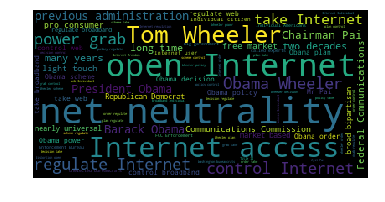

In [141]:
wordcloud_text = WordCloud().generate(' '.join(unique_comments.text_data))
# Generate plot
import matplotlib.pyplot as plt
plt.imshow(wordcloud_text)
plt.axis("off")
plt.show()

In [10]:
# import files
df_merged_zip = pd.read_csv('FCC_df_merged_zip.csv',encoding='utf8')